1. 데이터를 불러온 뒤, 숫자, 특수 문자 등을 제거하는 전처리 작업을 시행하시오. 그리고 '영화 기생충_review.txt'을 사전에 등록하시오

In [34]:
import pandas as pd
import numpy as np

f = open('영화 기생충_review.txt','r')
data = f.read()

In [35]:
import re

text = re.sub('[^A-Za-z가-힣\\s]',' ',data)
text

'별 개  준 사람들은   나베당임\n역쉬\n영화가 끝나고 가슴이 먹먹하고 답답햇습니다 너무나 충격적이었습니다  \n지금까지 나온 감독의 모든 작품이 압축되어있다는 느낌을 받음   Bomb   \n대단한 영화  몰입력 장난아님  후아\n그닥\n칸하고 안맞나봄 \n봉준호식의 코메디와 사회비판 페이소스\n좋았습니다\n군더더기 없이 깔끔한 영화  지금도 영화가 주는 메세지를 생각하는 중입니다\n볼만 했어요\n막 조조보고 나옴  기가 막힌 블랙코미디  시간 가는줄 모르고 집중하게 됨  보고 나서 더 생각나는 영화 여지껏 봉준호 영화 중 최고다\n전  재미었어요 생각 하게끔 만드는 영화\n올만에 한국영화 강추\n영화가 끝나고 생각함을 주는영화\n이건 진짜 봉준호 천재  \n김태호 무한도전보고 천재라  생각했는데  \n다른분야 같은 레벨   \n더불어 살 순 없을까   \n블랙코미디 굉장히 찝찝하고 숙연해진다\n나름\n몰입 \n기대하고 갔는데\n개인적으로 별로다 \n불편하다\n시간가는 줄 모르고 정말 재밌게 봤습니다 \n풍자를 기가막히게 잘 표현한 것 같습니다 \n아마     년 최고작\n송강호 나오면 무조건 보는데 역시나 믿고 보는 배우 역시 한국인들 대단해 방탄에 이어 영화까지 세계인의 마음을 사로잡다\ngood\n일반국민이던  배충이던  모두봐야할  영화\n칸영화제 수상과는 별개로       개인적으로 영화가 끝나고 기립박수를 치고 싶었습니다\n봉준호 감독님에게 경의를 표하고 싶습니다 \n당장은 어렵더라도  기우의 바램이 이루어지는 세상을 향해 \n뉴스로 닿지 않을 것을 전달해내는 과연 봉테일 \n묵직하게  잘 받았습니다  오버 \n두번 다시 봉준호 영화는 거른다    \n재밌어요 \n재미있고 상징적인 상업영화인데\n행위예술같은 고급스러움도 있어요 \n물론 반지하 장면은 좀 지저분하지만\n그게 현실이니까\n너무 재밌게 봤고 두번은 더 볼꺼예요   \n오랜만에 잘 만들어진 영화를 봤네요  \n대사 중에 불필요한   이 많아서 아쉬웠음\n글쎄          \n   

In [36]:
with open('기생충리뷰_전처리.txt','w') as f:
    f.write(text)

2. TDM을 구축하고 빈도를 파악하고 시각화하시오. 

In [37]:
from konlpy.tag import Okt
from collections import Counter

with open('영화 기생충_사전.txt') as f:
    terms = f.read().split("\n")[:-1]



#okt 객체 생성
okt = Okt()
nouns = okt.nouns(text)
count = Counter(nouns)

#명사 빈도 카운트
freq = []
for term in terms:
    freq.append(count[term])

In [38]:
#빈도수 데이터 프레임으로 생성
tdm = pd.DataFrame({'terms':terms, 'freq':freq})
tdm = tdm.set_index('terms').sort_values(by = 'freq',ascending = False)
tdm

,freq
terms,
봉준호,138
기생충,78
송강호,60
이선균,28
조여정,26
최우식,12
이정은,11
기우,3
기택,1


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#matplotlib 패키지 한글 폰트 설정 시작
plt.rcParams["font.family"] = 'Malgun Gothic'

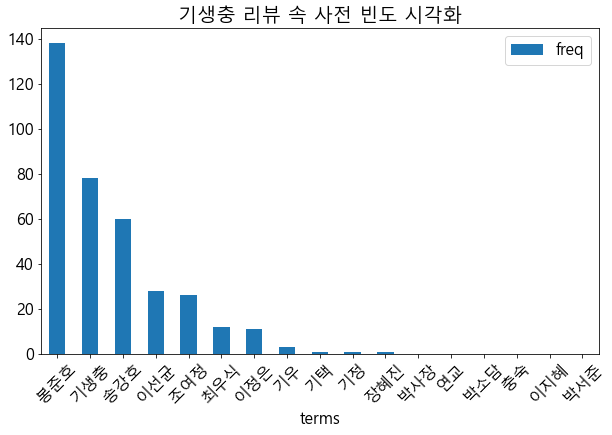

In [40]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['font.size'] = 16
plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(1,1)
plt.title("기생충 리뷰 속 사전 빈도 시각화")
tdm.plot.bar(ax = ax, rot=45)
plt.show()

<AxesSubplot:xlabel='terms'>

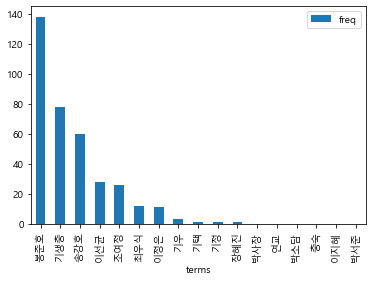

In [41]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm



%matplotlib inline
plt.rc('font', family='Malgun Gothic')

tdm.plot.bar()

3. extractNoun으로 명사를 추출하여 워드클라우드를 그리고 특성을 파악하시오
- 명사를 추출한 후, 2음절 이상이고 최소 30번 이상 언급된 명사만 추출하여 워드클라우드를 작성한다. 

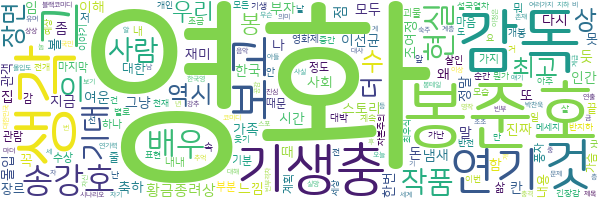

In [46]:
!pip install wordcloud
from wordcloud import WordCloud
from IPython.display import Image as image

wc = WordCloud(font_path = 'C:\\Windows\\Fonts\\NanumSquareRoundR.ttf',width = 600, height = 200, scale = 1.0, max_font_size = 200, background_color = "#FFFFFF")
wc.generate_from_frequencies(count)
wc.to_file("기생충.png")
image('기생충.png')